# Sentiment Analysis

Sentiment analysis is a method used to understand the sentiment within a piece of text, be it positive, negative, or neutral. The Python library TextBlob simplifies this process with a straightforward API.

Sentiment analysis models work by evaluating the words in a text and scoring them based on a pre-determined sentiment lexicon or by using machine learning models that have been trained to detect sentiment based on examples.

The "scoring" part is typically a numerical representation of the sentiment, which can range from negative to positive values. For example, -1.0 could represent a very negative sentiment, 0 could be neutral, and 1.0 could indicate a very positive sentiment.

## Interpret the Results:

The polarity score represents sentiment with negative values indicating negative sentiment, positive values indicating positive sentiment, and values close to zero indicating neutral sentiment.

Polarity is a float within the range [-1.0, 1.0], where -1 means negative sentiment and 1 means a positive sentiment.

Subjectivity is a float within the range [0.0, 1.0], where 0.0 is very objective and 1.0 is very subjective.


In [1]:
from textblob import TextBlob
import pandas as pd
import os
import matplotlib.pyplot as plt

## Data Preparation

From the file supplied from Teresa, I removed rows that contained data that was not a comment submitted.

In [5]:
# set base directory for reading and writing files
# base_directory = '/workspaces/prc/de-sentiment/data'

# when using ligntning.ai
base_directory = '/teamspace/studios/this_studio/prc/de-sentiment/data'

I saved the original file teresa.xlsx into teresa.csv

In [6]:
input_file = os.path.join(base_directory, 'processed', 'teresa.csv')
df = pd.read_csv(input_file)
df.head

<bound method NDFrame.head of                                              statement
0    The DE MMJ dispensaries are still grossly over...
1    Almost allof the DE qualifying conditions are ...
2    Watch out that the Recreational Market doesn't...
3    I am so appreciative that medical cards and di...
4    Best health decision I've ever made with my do...
..                                                 ...
416  The dispensaries could be more helpful with ne...
417  Since I got my card .I use edibles more . I sm...
418  It should be treated like alcohol, not ALLOWED...
419                                                NaN
420  It cost’s too much already then the street at ...

[421 rows x 1 columns]>

In [7]:
# Remove rows where all cells in that row are NA
df_cleaned = df.dropna(how='all')
df.head(10)

,statement
0,The DE MMJ dispensaries are still grossly over...
1,Almost allof the DE qualifying conditions are ...
2,Watch out that the Recreational Market doesn't...
3,I am so appreciative that medical cards and di...
4,Best health decision I've ever made with my do...
5,When will recreational marijuana be legalized ...
6,I like the medical system now.
7,Good
8,I would like to see the medical program be sep...
9,I think medical cannabis patients would need a...


In [8]:
# Format the statement column into a string
df['statement'] = df['statement'].astype(str)
df.head(10)

,statement
0,The DE MMJ dispensaries are still grossly over...
1,Almost allof the DE qualifying conditions are ...
2,Watch out that the Recreational Market doesn't...
3,I am so appreciative that medical cards and di...
4,Best health decision I've ever made with my do...
5,When will recreational marijuana be legalized ...
6,I like the medical system now.
7,Good
8,I would like to see the medical program be sep...
9,I think medical cannabis patients would need a...


## Run TextBlob(text).sentiment

The new DataFrame sentiment_df contains only the 'statement' column along with the 'polarity' and 'subjectivity' columns resulting from the sentiment analysis.


In [9]:
# Define a function that applies sentiment analysis
def analyze_sentiment(text):
    return TextBlob(text).sentiment

# Apply the function to the 'statement' column
df['sentiment'] = df['statement'].apply(analyze_sentiment)

# Separate the tuple into different columns
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['sentiment'].apply(lambda x: x.subjectivity)

# Create a new DataFrame with only the sentiment analysis results
sentiment_df = df[['statement', 'polarity', 'subjectivity']]

In [10]:
# Verify the data frame
sentiment_df.head(10)

,statement,polarity,subjectivity
0,The DE MMJ dispensaries are still grossly over...,-0.281250,0.433036
1,Almost allof the DE qualifying conditions are ...,0.000000,0.000000
2,Watch out that the Recreational Market doesn't...,0.167929,0.558571
3,I am so appreciative that medical cards and di...,0.333333,0.433333
4,Best health decision I've ever made with my do...,1.000000,0.300000
5,When will recreational marijuana be legalized ...,0.000000,0.000000
6,I like the medical system now.,0.000000,0.000000
7,Good,0.700000,0.600000
8,I would like to see the medical program be sep...,0.140506,0.430923
9,I think medical cannabis patients would need a...,0.200000,0.225000


# Summary Statistics

Summary statistics in the context of pandas, a data analysis library in Python, are numerical data that provide an overview of the features of a dataset. When we talk about pandas summary statistics, we're typically referring to functions that compute these statistical measures for columns in a DataFrame or a Series.

**Count:** The number of non-missing (non-null) entries. This tells you how many valid data points you have.

**Mean:** The average of all the numbers. It adds up all the values and divides by the count.

**Standard Deviation (std):** A measure of how spread out the numbers are. A low standard deviation means the numbers are close to the mean, while a high standard deviation means they are spread out over a wider range.

**Minimum (min):** The smallest number in the dataset.

**25th Percentile:** This is the value below which 25% of the data falls. It’s a measure of the lower-middle of your data.

**50th Percentile (Median):** The middle value of the dataset, which splits the data into two equal parts. Half the numbers are above the median and half are below.

**75th Percentile:** The value below which 75% of the data falls. It’s a measure of the upper-middle of your data.

**Maximum (max):** The largest number in the dataset.


In [11]:
# Generate and display summary statistics of polarity
summary_statistics = sentiment_df['polarity'].describe()
print(summary_statistics)

count    421.000000
mean       0.118155
std        0.242833
min       -1.000000
25%        0.000000
50%        0.068182
75%        0.228282
max        1.000000
Name: polarity, dtype: float64


In [12]:
# Generate and display summary statistics of subjectivity
summary_statistics_subjectivity = sentiment_df['subjectivity'].describe()
print(summary_statistics_subjectivity)

count    421.000000
mean       0.332144
std        0.253657
min        0.000000
25%        0.100000
50%        0.340000
75%        0.500000
max        1.000000
Name: subjectivity, dtype: float64


## Histogram

A histogram is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable and was first introduced by Karl Pearson. To make a histogram, you typically follow these steps:

1. **Divide the entire range of values** into a series of intervals (these intervals are also called 'bins' or 'buckets').
2. **Count how many values fall into each interval**. The intervals must be adjacent and often are (but are not required to be) of equal size.
3. **Plot the count of values** that fall into each interval. Each interval is represented by a bar; the height of the bar corresponds to the count of data points in that bin.

In the context of your polarity score frequency histogram:

- The **x-axis** (horizontal) would represent bins of polarity scores, ranging from -1.0 to 1.0. The range might be divided into regular intervals, such as -1.0 to -0.8, -0.8 to -0.6, and so on, up to 1.0.
- The **y-axis** (vertical) would indicate the frequency of text samples that fall within each of these polarity score intervals.
- Each **bar** in the histogram would represent the number of text samples that have a polarity score within the interval of that bar.

For instance, if you have a lot of text data with positive sentiment, you might see higher bars in the intervals that approach 1.0. Neutral texts would be represented by bars near the 0 mark, and negative texts would result in higher bars on the negative side of the scale.

Histograms are very useful for showing the shape and spread of the data, and they can help you quickly grasp the central tendency, variability, and skewness of the data distribution. They are particularly useful in data analysis for identifying patterns, outliers, skewness, etc., in the underlying data.

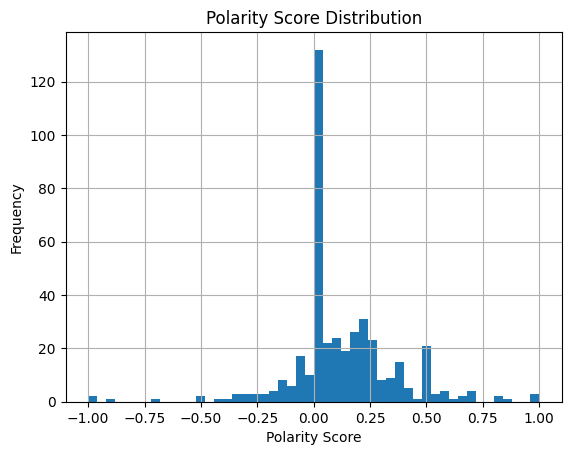

In [13]:
sentiment_df['polarity'].hist(bins=50)
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

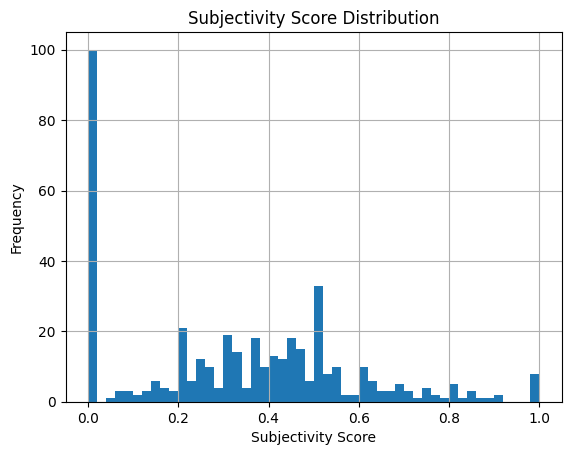

In [14]:
sentiment_df['subjectivity'].hist(bins=50)
plt.title('Subjectivity Score Distribution')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.show()

In [15]:
output_file = os.path.join(base_directory, 'processed', 'sentiment.csv')
sentiment_df.to_csv(output_file, index=False)                    
                    